In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [1]:
import numpy as np
import pandas as pd
import sympy
from sympy import *
from operator import mul
from functools import reduce
import mpmath as mp
from mpmath import fac
import functools
from sympy import init_printing
from sympy.core.decorators import _sympifyit, call_highest_priority
from IPython.display import display_latex
init_printing()
import copy
import collections

import matplotlib


from matplotlib import pyplot as plt

from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show


import scipy
from scipy.signal import argrelextrema
from scipy import stats as stats
from scipy import optimize
import scipy.interpolate as interpolate
from scipy.interpolate import UnivariateSpline

In [2]:
def drift(r,l,delta=0):
    x = r[0]
    px = r[1]
    y = r[2]
    py = r[3]
    
    xn = x + l * px / np.sqrt((1+delta)**2 - px**2 - py**2)
    pxn = px
    yn = y + l * py / np.sqrt((1+delta)**2 - px**2 - py**2)
    pyn = py
    
#     print(1 - px**2 - py**2)
    
    return xn, pxn, yn, pyn

def quadf(r,l,k,delta=0):
    x = r[0]
    px = r[1]
    y = r[2]
    py = r[3]
    
    D = 1+delta
    
    omega = np.sqrt(k/D)
    sin = np.sin(omega*l)
    cos = np.cos(omega*l)
    sinh = np.sinh(omega * l)
    cosh = np.cosh(omega * l)
    
    xn = cos * x + sin * px / omega
    pxn = cos * px - sin * omega * x
    yn = cosh * y + sinh * py / omega
    pyn = sinh * omega * y + cosh * py
    
    return xn, pxn, yn, pyn

def quadff(r,l,k,delta=0):
    x = r[0]
    px = r[1]
    y = r[2]
    py = r[3]
    
    D = 1+delta
    
    omega = np.sqrt(k/D)
    sin = np.sin(omega*l)
    cos = np.cos(omega*l)
    sinh = np.sinh(omega * l)
    cosh = np.cosh(omega * l)
    
    xn = cosh * x + sinh * px / omega
    pxn = cosh * px + sinh * omega * x
    yn = cos * y + sin * py / omega
    pyn = cos * py - sin * omega * y
    
    return xn, pxn, yn, pyn

In [6]:
l2 = 0.25
l3 = 2.5
l4 = 0.5
l5 = 2.5
l6 = 0.25

k2 = 0.54102
k4 = k2
k6 = k2

r0 = np.array([10e-5,0,10e-4,0])

data = [r0]


duration = 10000

for i in range(duration):
    r2 = quadf(r0,l2,k2)
    r3 = drift(r2,l3)
    r4 = quadff(r3,l4,k4)
    r5 = drift(r4,l5)
    r6 = quadf(r5,l6,k6)

    data.append(r6)
    r0 = np.copy(r6)

data = np.array(data)
# mx = 1.1*abs(data[:,0].max())
# mxx= 1.1*abs(data[:,1].max())
# plt.xlim(-mx,mx)
# plt.ylim(-mxx,mxx)
# plt.scatter(data[:,0],data[:,1],s=1,c=range(data.shape[0]),cmap='jet')
# plt.grid()
# plt.show()

In [7]:
# data = np.array(data)
# mx = 1.1*abs(data[:,2].max())
# mxx= 1.1*abs(data[:,3].max())
# plt.xlim(-mx,mx)
# plt.ylim(-mxx,mxx)
# plt.scatter(data[:,2],data[:,3],s=5,c=range(data.shape[0]),cmap='jet')
# plt.grid()
# plt.show()

In [8]:
omega = np.sqrt(k2)
sin = np.sin(omega*l2)
cos = np.cos(omega*l2)
sinh = np.sinh(omega * l2)
cosh = np.cosh(omega * l2)
Mq = [[cos, sin/omega,0,0],[-omega * sin, cos, 0, 0],[0,0,cosh,sinh/omega],[0,0,omega * sinh, cosh]]

omega = np.sqrt(k4)
sin = np.sin(omega*l4)
cos = np.cos(omega*l4)
sinh = np.sinh(omega * l4)
cosh = np.cosh(omega * l4)
Mqq = [[cosh,sinh/omega,0,0],[omega * sinh, cosh,0,0],[0,0,cos, sin/omega],[0,0,-omega * sin, cos]]


Md = [[1,l3,0,0],[0,1,0,0],[0,0,1,l3],[0,0,0,1]] 

M = np.dot(Md,Mq)
M = np.dot(Mqq,M)
M = np.dot(Md,M)
M = np.dot(Mq,M)

r0 = np.array([10e-5,0,10e-4,0])
dataMATRICES = [r0]

duration = 2000

for i in range(duration):
    r = np.dot(M,r0)
    dataMATRICES.append(r)
    r0 = np.copy(r)

dataMATRICES = np.array(dataMATRICES)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

from math import sqrt
SPINE_COLOR = 'gray'

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': '\\usepackage{gensymb}',
              'axes.labelsize': 20, # fontsize for x and y labels (was 10)
              'axes.titlesize': 20,
              'font.size': 20, # was 10
              'legend.fontsize': 20, # was 10
              'xtick.labelsize': 20,
              'ytick.labelsize': 20,
              'text.usetex': False,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif',
              'axes.formatter.limits': [-3, 3],
              'axes.formatter.use_mathtext': True,
    }

    
    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

In [10]:
latexify()

In [11]:
matplotlib.rcParams.keys()

/opt/anaconda3/lib/python3.7/_collections_abc.py:705: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return '{0.__class__.__name__}({0._mapping!r})'.format(self)


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-3, 3],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': True,
         

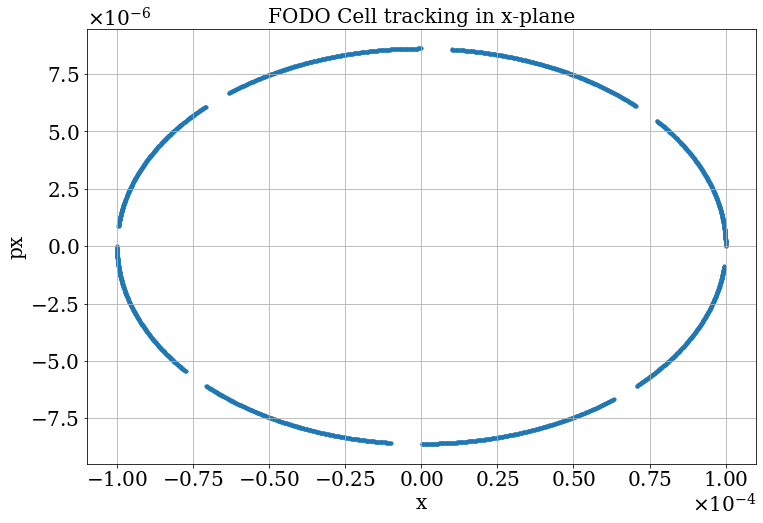

In [12]:
mx = 1.1*abs(dataMATRICES[:,0].max())
mxx= 1.1*abs(dataMATRICES[:,1].max())



fig = plt.figure(figsize=(12,8))

plt.scatter(dataMATRICES[:,0],dataMATRICES[:,1],s=10,label='Matrices')

#plt.scatter(data[:,0],data[:,1],s=0.1,alpha=1,label='Lie Maps')

plt.title('FODO Cell tracking in x-plane')
plt.xlabel('x')
plt.ylabel('px')
plt.grid()
plt.xlim(-mx,mx);
plt.ylim(-mxx,mxx);
#plt.legend();
#plt.savefig('FODOtrackxplaneElement.png')
plt.savefig('FODOtrackxplaneMatrix.png')

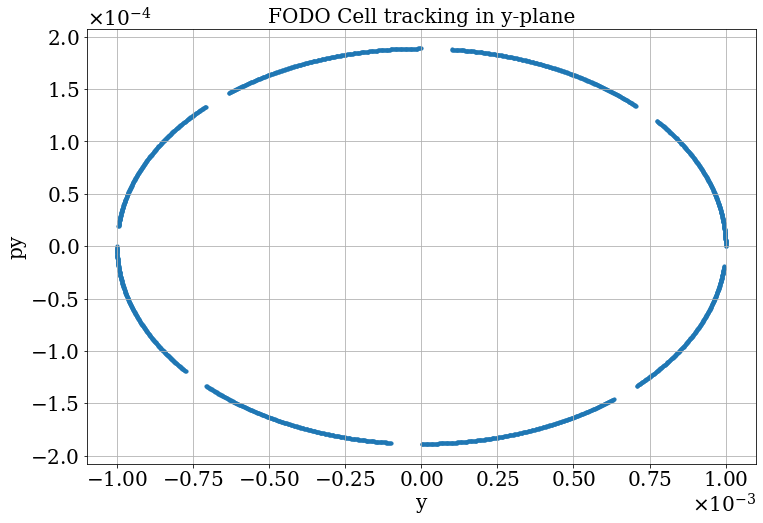

In [13]:
mx = 1.1*abs(dataMATRICES[:,2].max())
mxx= 1.1*abs(dataMATRICES[:,3].max())

fig = plt.figure(figsize=(12,8))

plt.scatter(dataMATRICES[:,2],dataMATRICES[:,3],s=10,label='Matrices')

#plt.scatter(data[:,2],data[:,3],s=0.1,alpha=1,label='Lie Maps')

plt.title('FODO Cell tracking in y-plane')
plt.xlabel('y')
plt.ylabel('py')
plt.grid()
plt.xlim(-mx,mx);
plt.ylim(-mxx,mxx);
#plt.legend();
#plt.savefig('FODOtrackyplaneElement.png')
plt.savefig('FODOtrackyplaneMatrix.png')

# no Idea what this is

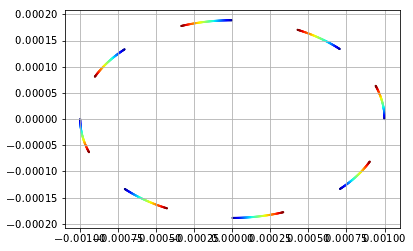

In [3]:
l2 = 0.25
l3 = 2.5
l4 = 0.5

k2 = 0.54102
k4 = k2
k6 = k2

omega = np.sqrt(k2)
sin = np.sin(omega*l2)
cos = np.cos(omega*l2)
sinh = np.sinh(omega * l2)
cosh = np.cosh(omega * l2)
Mq = [[cos, sin/omega,0,0],[-omega * sin, cos, 0, 0],[0,0,cosh,sinh/omega],[0,0,omega * sinh, cosh]]

omega = np.sqrt(k4)
sin = np.sin(omega*l4)
cos = np.cos(omega*l4)
sinh = np.sinh(omega * l4)
cosh = np.cosh(omega * l4)
Mqq = [[cosh,sinh/omega,0,0],[omega * sinh, cosh,0,0],[0,0,cos, sin/omega],[0,0,-omega * sin, cos]]


Md = [[1,l3,0,0],[0,1,0,0],[0,0,1,l3],[0,0,0,1]] 

M = np.dot(Md,Mq)
M = np.dot(Mqq,M)
M = np.dot(Md,M)
M = np.dot(Mq,M)

r0 = np.array([10e-5,0,10e-4,0])
dataMATRICES = [r0]

duration = 1000

for i in range(duration):
    r = np.dot(M,r0)
    dataMATRICES.append(r)
    r0 = np.copy(r)

dataMATRICES = np.array(dataMATRICES)
mx = 1.1*abs(dataMATRICES[:,2].max())
mxx= 1.1*abs(dataMATRICES[:,3].max())
plt.xlim(-mx,mx)
plt.ylim(-mxx,mxx)
plt.scatter(dataMATRICES[:,2],dataMATRICES[:,3],s=1,c=range(dataMATRICES.shape[0]),cmap='jet')
plt.grid()
plt.show()

In [4]:
M

array([[ 0.70734929,  8.20626145,  0.        ,  0.        ],
       [-0.06088729,  0.70734929,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.70734929,  3.74374337],
       [ 0.        ,  0.        , -0.13346454,  0.70734929]])

In [6]:
M[0][0]+M[1][1]

1.4146985708654245

In [7]:
M[2][2] + M[3][3]

1.414698570865424

# Sextupole Example

In [3]:
ld = 1.5
lqf = 0.5
lqd = 1.25#2.5#1.25
_lds = 0.5 #0# 0.25
lsext = 0.1


k1 = 0.637#0.54102
k2 = 0.27051#k1/2
k3 = -0.15

r0 = np.array([[10e-7,0,0,0],
             [10e-6,0,0,0],
             [10e-5,0,0,0],
             [10e-5,0,0,0],
             [10e-4,0,0,0],
             [10e-3,0,0,0],
             [10e-2,0,0,0],
             [0.25,0,0,0],
             [0.5,0,0,0],
             [0.75,0,0,0],
             [1,0,0,0],
             [1.25,0,0,0],
             [1.5,0,0,0],
             [1.75,0,0,0],
             [2,0,0,0],
             [2.2,0,0,0]])

data = []


duration = 2000

delta = 0.2#0.003326816*15#0.003326816*15#0.003326816*14.65
for pos in r0:
    r1 = np.copy(pos)
    data.append(r1)

    for i in range(duration):
        #print(r1,lqf,k1)
        r2 = quadf(r1,lqf,k1,delta)
        r3 = drift(r2,ld,delta)
        r4 = quadff(r3,lqd,k2,delta)
        r5 = drift(r4,_lds/2,delta)#lds
        r6 = r5 #later inserted sextupole
        r7 = drift(r6,_lds/2,delta)#lds
        r8 = quadff(r7,0,k2,delta)#lqd
        r9 = drift(r8,ld,delta)
        r10 = quadf(r9,lqf,k1,delta)
        r10 = np.asarray(r10)

        data.append(r10)
        r1 = np.copy(r10)

data = np.array(data)

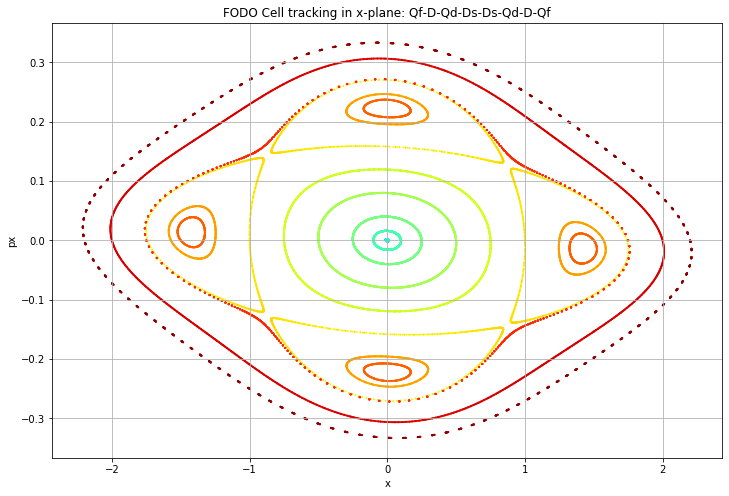

In [4]:
fig =plt.figure(figsize=(12,8))

plt.title('FODO Cell tracking in x-plane: Qf-D-Qd-Ds-Ds-Qd-D-Qf')
plt.xlabel('x')
plt.ylabel('px')

mx = 1.1*abs(data[:,0].max())
mxx= 1.1*abs(data[:,1].max())
plt.xlim(-mx,mx)
plt.ylim(-mxx,mxx)
plt.scatter(data[:,0],data[:,1],s=1,c=range(data.shape[0]),cmap='jet')

plt.grid()
# plt.savefig('FODO_DriftNonLin.png')
